In [1]:
import sklearn.metrics as metrics
import sklearn.linear_model as linear_model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np
import statsmodels.api as sm
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/Users/austinlasseter/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
## Load the data into a DataFrame
stores=pd.read_csv('/Users/austinlasseter/DSI-EC-2/projects/datasets/stores_modeling.csv')
stores=stores.drop(['Unnamed: 0'], axis=1)

## What's the R-squared of our model?

In [49]:
# What's the mean annual profit of all stores? This is the guess we want to beat with our model.
stores.annual_profit_per_store.mean()

48249.49529961269

In [3]:
stores.columns

Index(['store_id', 'fips', 'metro', 'unemployment', 'income', 'population',
       'ave_bottle_price', 'ave_number_bottles', 'annual_profit_per_store',
       'number_of_stores', 'density', 'unemp_bins', 'income_bins', 'pop_bins',
       'nstores_bins', 'density_bins', 'suburbs', 'town', 'rural'],
      dtype='object')

In [4]:
# This is model 7c from the previous notebook (I'm using SK Learn this time, not stats models)
dep = stores['annual_profit_per_store'] # This is the outcome I want to predict
indep = stores.drop(['store_id', 'fips', 'metro', 'unemployment', 'income', 'population',
       'annual_profit_per_store',
       'number_of_stores', 'unemp_bins', 'income_bins', 'pop_bins',
       'nstores_bins', 'density_bins'], 
                    axis = 'columns') # These are the features that predict it
lm = linear_model.LinearRegression(fit_intercept=True,
                                   normalize=False,
                                   copy_X=True,
                                   n_jobs=1)
lm.fit(X=indep, y=dep)
predicted = lm.predict(X=indep) # y_preds
true = dep

In [64]:
# Coefficients
lm.coef_

array([  7.77516018e+03,   7.81610807e+02,   7.86491539e+00,
         1.62083749e+04,  -1.33265169e+03,  -2.33791978e+04])

In [5]:
# What's the distribution of our true values?
dep.describe()

count      1291.000000
mean      48249.495300
std       56430.637266
min         267.624000
25%       11712.432200
50%       26298.034600
75%       61575.715800
max      295762.362600
Name: annual_profit_per_store, dtype: float64

In [6]:
# What's the distribution of our predicted values?
preds=pd.DataFrame(predicted)
preds.describe()

,0
count,1291.000000
mean,48249.495300
std,21764.110557
min,-16478.597379
25%,32800.623040
50%,47003.841156
75%,61729.926862
max,173224.781758


In [7]:
# This is our R-sqsuared score: we explain about 13% of the variability in the outcome with this model.
print(lm.score(indep, dep))

0.148748274728


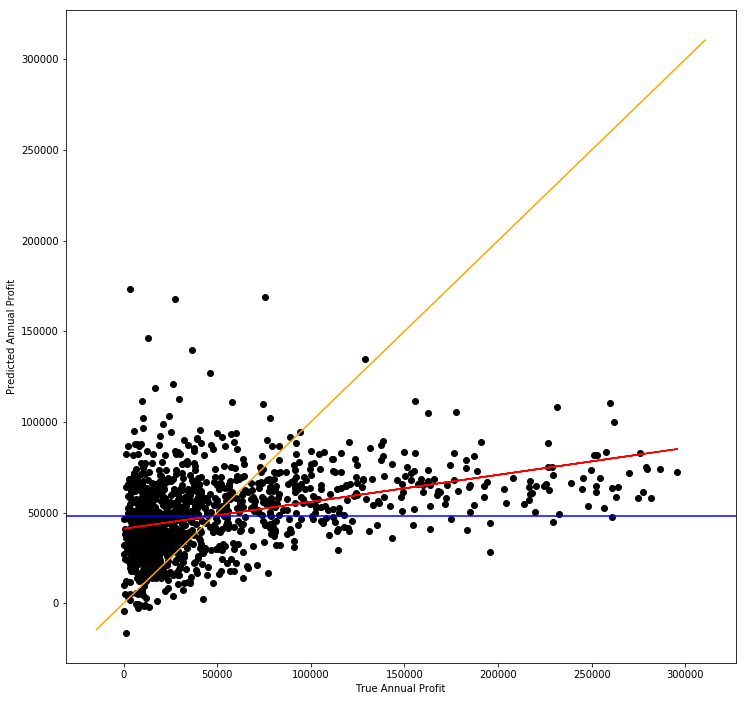

In [62]:
# create a figure
fig = plt.figure(figsize=(12,12))
fig.set_figheight(12)
fig.set_figwidth(12)

# get the axis
ax = fig.gca()

# plot it
ax.scatter(x=dep, y=preds, c='k')
ax.set(xlabel='True Annual Profit', ylabel='Predicted Annual Profit')

# add the trend line of my model 
fit = np.polyfit(dep, preds, deg=1)
ax.plot(dep, fit[0] * dep + fit[1], color='red')

# add the line of best fit (45-degree angle)
ax.plot(ax.get_xlim(), ax.get_xlim(), color='orange')

# plot a line at the mean
plt.axhline(y=stores.annual_profit_per_store.mean(), color='blue')

# Interpretation: My model is under-predicting true annual profit, but it's better than just taking the mean (flat)

## Train-Test Split

In [15]:
# Train-test split
from sklearn.model_selection import train_test_split

In [16]:
y = stores['annual_profit_per_store'] 

X = stores.drop(['store_id', 'fips', 'metro', 'unemployment', 'income', 'population',
       'annual_profit_per_store',
       'number_of_stores', 'unemp_bins', 'income_bins', 'pop_bins',
       'nstores_bins', 'density_bins'], 
                    axis = 'columns')

In [17]:
# cross-validation-train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [18]:
print(X.shape, y.shape)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1291, 6) (1291,)
(645, 6) (645,)
(646, 6) (646,)


In [19]:
from sklearn.linear_model import LinearRegression

slr = LinearRegression()
slr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [20]:
# This is our R-squared of our model on the training data:
print(slr.score(X_train, y_train))

0.197337848768


In [21]:
# This is the R-squared of our model on the test data: It went down, but not by too much.
print(slr.score(X_test, y_test))

0.059869989654


## K-folds crossvalidation

In [22]:
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict

In [23]:
# Iterate using CV scores to determine how you're doing
# model selection/tuning stage
lr = LinearRegression()
print(cross_val_score(slr, X, y, cv=5))
scores=cross_val_score(slr, X, y, cv=5)
print(np.mean(scores))
# these are all R-squared scores ON THE TRAINING DATA (across 5 folds), and their average.
lr.fit(X,y)
# One last fit on ALL the training data

[ 0.1060688   0.14994638  0.12876918  0.12959634  0.16688954]
0.136254048974


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [24]:
# Now we're predicting/scoring ON THE TESTING DATA
predictions = cross_val_predict(lr, X, y, cv=5) # Note: lr was defined in the previous cell.
r2 = metrics.r2_score(y, predictions)
print(r2) 

0.141641184781


In [25]:
# Our model explains about 14% of the variation in the outcome, annual per-store profit